In [2]:
import os
import tensorflow as tf
from matplotlib import pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [3]:
data_dir = '/kaggle/input/deepfake-and-real-images/Dataset'

In [4]:
os.listdir(data_dir)

['Validation', 'Test', 'Train']

In [5]:
print(len( os.listdir((os.path.join(data_dir,'Train','Real')))))
print(len( os.listdir((os.path.join(data_dir,'Train','Fake')))))

70001
70001


In [6]:
for image_class in os.listdir((os.path.join(data_dir,'Train','Real'))):
  print(image_class)
  break

real_58276.jpg


In [7]:
img = cv2.imread(os.path.join(data_dir,'Train','Real','real_58276.jpg'))

In [8]:
type(img)

numpy.ndarray

In [9]:
img.shape

(256, 256, 3)

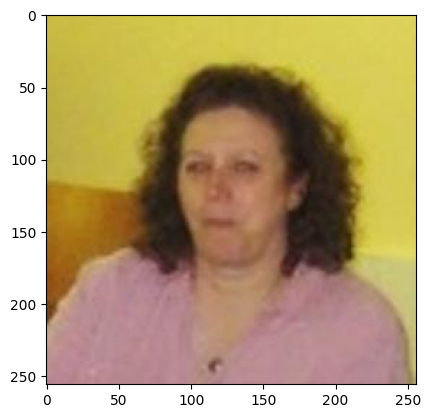

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [13]:
data_dir = '/kaggle/input/deepfake-and-real-images/Dataset/Train'
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 140002 files belonging to 2 classes.


In [17]:
data_iterator = data.as_numpy_iterator()

In [22]:
batch = data_iterator.next()

In [23]:
print(len(batch))

2


In [24]:
#Images represented as Numpy Arrays
batch[0].shape

(32, 256, 256, 3)

In [25]:
batch[1]

array([1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1], dtype=int32)

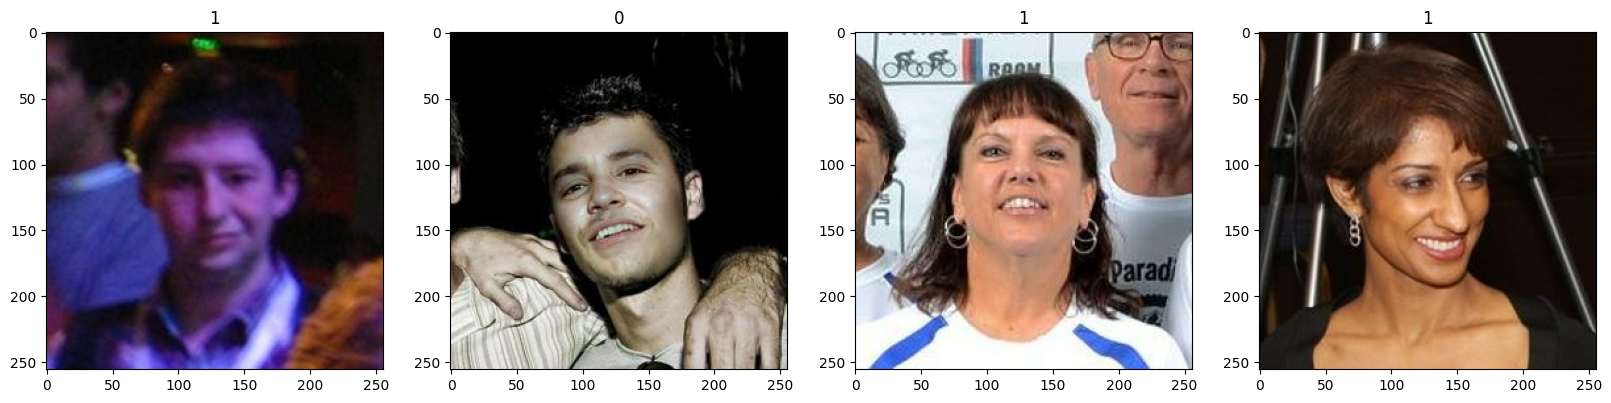

In [26]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [27]:
data = data.map(lambda x,y: (x/255,y))

In [28]:
scaled_iterator = data.as_numpy_iterator()

In [29]:
batch = scaled_iterator.next()

In [30]:
len(data)

4376

In [34]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [35]:
train_size+val_size+test_size

4375

In [37]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [38]:
model = Sequential()

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Create a CNN model
model = Sequential()

# Add convolutional layers and pooling layers
model.add(Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3, 3), strides=1, activation='relu'))
model.add(MaxPooling2D())

# Flatten the output of the convolutional layers
model.add(Flatten())

# Add fully connected layers with dropout
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Add dropout layer with a dropout rate of 0.5

model.add(Dense(1, activation='sigmoid'))

In [41]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)       

In [43]:
logdir='logs'

In [44]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [49]:
hist = model.fit(train, epochs=1, validation_data=val, callbacks=[tensorboard_callback])

3063/3063 [==============================] - 3303s 1s/step - loss: 0.2060 - accuracy: 0.9148 - val_loss: 0.1783 - val_accuracy: 0.9264


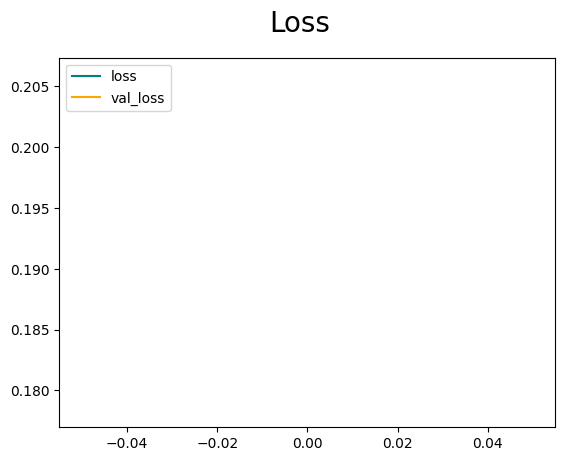

In [50]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal',label='loss')
plt.plot(hist.history['val_loss'], color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc="upper left")
plt.show()

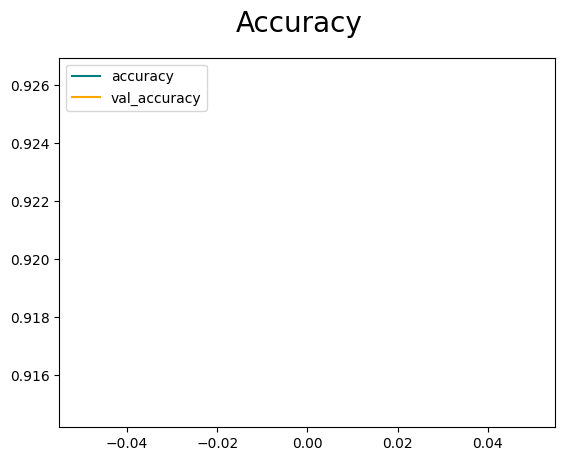

In [51]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [53]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [54]:
len(test)

437

In [55]:
for batch in test.as_numpy_iterator():
  X, y =batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 0s 285ms/step


In [57]:
print("Precision:",pre.result().numpy())
print("Recall:",re.result().numpy())
print("Accuracy:",acc.result().numpy())

Precision: 0.9161826
Recall: 0.94763947
Accuracy: 0.930492


In [59]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix, f1_score

# Assuming you have a test dataset or generator named 'test'
# and a pre-trained model named 'model'

pre = tf.keras.metrics.Precision()
re = tf.keras.metrics.Recall()
acc = tf.keras.metrics.Accuracy()

# Initialize variables for collecting true labels and predicted labels
true_labels = []
predicted_labels = []

In [60]:
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score

# Assuming you have a test dataset or generator named 'test'
# and a pre-trained model named 'model'

# Set the threshold for classification
threshold = 0.5

# Initialize variables for collecting true labels and predicted probabilities
true_labels = []
predicted_labels = []

# Iterate through the test data and calculate metrics
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)

    # Convert predicted probabilities to class labels using the threshold
    predicted_labels.extend((yhat >= threshold).astype(int))
    true_labels.extend(y)

# Convert lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Calculate F1 score
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print("Confusion Matrix:")
print(cm)
print("F1 Score:", f1)

1/1 [==============================] - 0s 395ms/step
Confusion Matrix:
[[6380  607]
 [ 366 6631]]
F1 Score: 0.9303989502880546


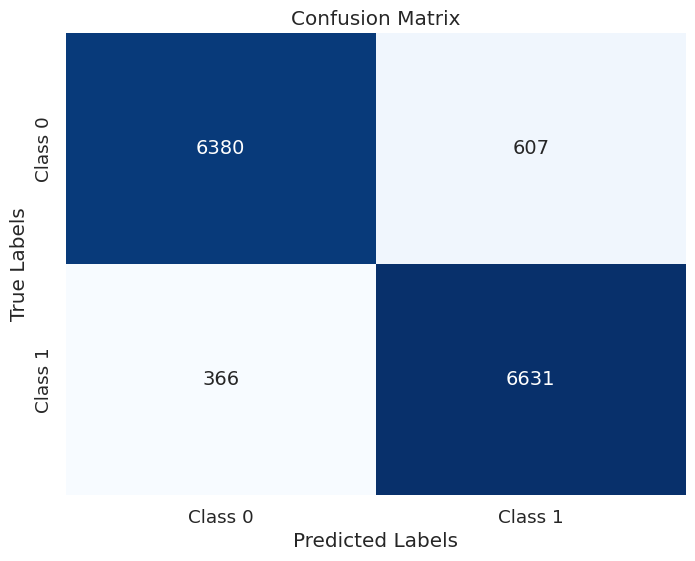

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have the confusion matrix 'cm' calculated

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            annot_kws={'size': 14}, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [47]:
import pickle

# Assuming 'model' is the variable holding your model
# For example, if 'model' is a scikit-learn classifier:
# model = SomeClassifier()

# Save the model to a file
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [ ]:
import hdf5pickle
with open('model.pkl', 'rb') as f:
    data = hdf5pickle.load(f)
with open('h5_file.h5', 'wb') as f:
    hdf5pickle.dump(data, f)